# Multivariable Chain Rule

The **multivariable chain rule** unites the principles behind the single variable chain rule and the partial derivative. For a function $f(v(t))$ which receives another function $v(t)$ as input, one can take its derivative with respect to $t$ by applying the chain rule, first calculating the derivative of $v(t)$ with respect to $t$, or $\frac{dv}{dt}$.

## v(t)

The following example demonstrates this principle with $v(t)$, a function of a single variable which produces a two-variable, spiral-like output in terms of $x$ and $y$.

$$ 
v(t) = \left[ \begin{array}{c} e^{-\frac{t}{5}} cos(\pi t) \\
                               e^{-\frac{t}{5}} sin(\pi t) \end{array} \right] = 
       \left[ \begin{array}{c} v_x(t) \\
                               v_y(t) \end{array} \right]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

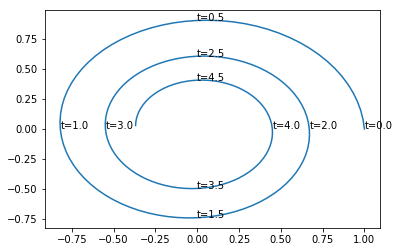

In [2]:
t = np.arange(0, 5, 0.025)
V = [np.exp(-t / 5) * np.cos(np.pi * t), np.exp(-t / 5) * np.sin(np.pi * t)]

plt.plot(V[0], V[1])
for v_x, v_y, t_i in zip(V[0][::20], V[1][::20], t[::20]):
    plt.text(v_x, v_y, 't={}'.format(t_i))
plt.show()

## f(v(t))

The second function $f(v(t))$ computes the product of the $x$ and $y$ terms of the output of $v(t)$, yielding a single variable as its output.

$$ f(t) = v_x(t) v_y(t) $$

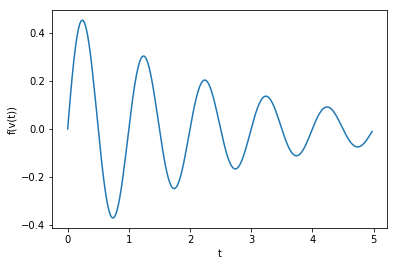

In [3]:
F = V[0] * V[1]

plt.plot(t, F)
plt.xlabel('t')
plt.ylabel('f(v(t))')
plt.show()

## derivative of f(v(t)) with respect to t

To calculate $\frac{df}{dt}$ we apply the chain rule, which leads us to first calculate $\frac{dv}{dt}$ through $\frac{df}{dv}$.

$$
\frac{df(v(t))}{dt} = \frac{df}{dv} \frac{dv}{dt} = 
v_x^{(1)}(t) v_y(t) + v_x(t) v_y^{(1)}(t)
$$

$$
v_x^{(1)}(t) = -\frac{1}{5}e^{-\frac{t}{5}} cos(\pi t) - \pi e^{-\frac{t}{5}} sin(\pi t)
$$

$$
v_y^{(1)}(t) = -\frac{1}{5}e^{-\frac{t}{5}} sin(\pi t) + \pi e^{-\frac{t}{5}} cos(\pi t)
$$

$$
\frac{df(v(t))}{dt} = 
v_x^{(1)}(t) v_y(t) + v_x(t) v_y^{(1)}(t) = 
-e^{-\frac{2t}{5}} (\frac{2}{5} sin(\pi t) cos(\pi t) - \pi cos(2 \pi t))
$$

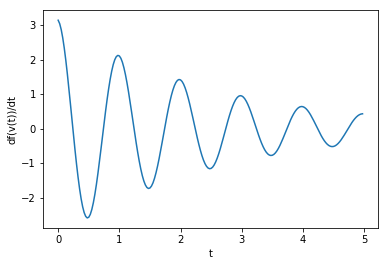

In [4]:
df = -np.exp(-2 * t / 5.0) * \
     (2 / 5.0 * np.cos(np.pi * t) * np.sin(np.pi * t) - \
     np.pi * np.cos(2 * np.pi * t))

plt.plot(t, df)
plt.xlabel('t')
plt.ylabel('df(v(t))/dt')
plt.show()

# Partial Derivatives of Vector Fields

Like scalar fields, we can also take the partial derivatives of vector fields. The partial derivative of a vector field of $x$ and $y$ describes the rate of change of the vectors with respect to changes in either $x$ or $y$. For a two-variable vector field, its partial derivative actually produces two vector fields, one with respect to $x$ and another with respect to $y$.

## Plot vector field

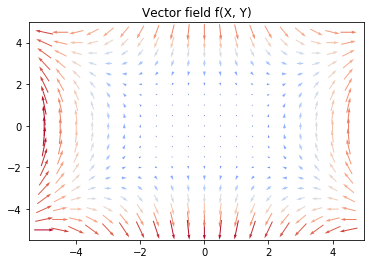

In [5]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
Xm, Ym = np.meshgrid(X, Y)
vf = lambda x, y : (np.multiply(x, y), x**2 - y**2)
U, V = vf(Xm, Ym)

plt.figure()
plt.title('Vector field f(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

## Plot derivative of vector field

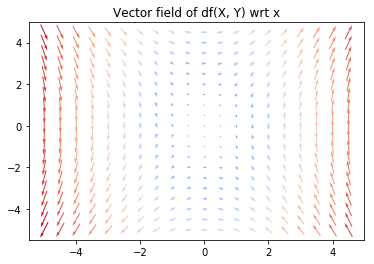

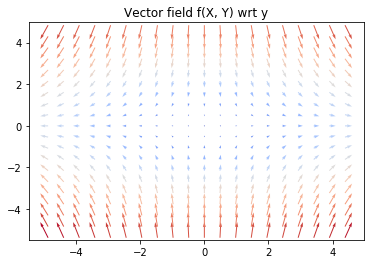

In [6]:
dvf_dx = lambda x, y : (y, 2 * x)
dvf_dy = lambda x, y : (x, -2 * y)
dU_dx, dV_dx = dvf_dx(Xm, Ym)
dU_dy, dV_dy = dvf_dy(Xm, Ym)

plt.figure()
plt.title('Vector field of df(X, Y) wrt x')
Clr = np.hypot(dU_dx, dV_dx)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], dU_dx[::d, ::d], dV_dx[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

plt.figure()
plt.title('Vector field f(X, Y) wrt y')
Clr = np.hypot(dU_dy, dV_dy)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], dU_dy[::d, ::d], dV_dy[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)